In [11]:
import pandas as pd  
import sqlite3 
conn = sqlite3.connect('lahman_1871-2022.sqlite')

In [19]:
query = '''
SELECT * 
FROM Teams 
INNER JOIN TeamsFranchises 
ON Teams.franchID = TeamsFranchises.franchID 
WHERE Teams.G >= 150 
AND TeamsFranchises.active = 'Y';
'''
# Creating dataframe from query.
Teams = conn.execute(query).fetchall()

In [20]:
teams_df = pd.DataFrame(Teams)
teams_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,...,603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,...,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,...,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,...,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,...,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


In [21]:
cols = ['yearID','lgID','teamID','franchID','divID',
        'Rank','G','Ghome','W','L','DivWin','WCWin',
        'LgWin','WSWin','R','AB','H','2B','3B','HR',
        'BB','SO','SB','CS','HBP','SF','RA','ER','ERA',
        'CG','SHO','SV','IPouts','HA','HRA','BBA','SOA',
        'E','DP','FP','name','park','attendance','BPF',
        'PPF','teamIDBR','teamIDlahman45','teamIDretro',
        'franchID','franchName','active','NAassoc']
teams_df.columns = cols

In [22]:
print(teams_df.head(2))

   yearID lgID teamID  franchID divID  Rank    G  Ghome   W   L  ...  \
0    1961   AL    LAA       ANA  None     8  162   82.0  70  91  ...   
1    1962   AL    LAA       ANA  None     3  162   81.0  86  76  ...   

  attendance  BPF  PPF teamIDBR  teamIDlahman45  teamIDretro  franchID  \
0     603510  111  112      LAA             LAA          LAA       ANA   
1    1144063   97   97      LAA             LAA          LAA       ANA   

                      franchName  active  NAassoc  
0  Los Angeles Angels of Anaheim       Y     None  
1  Los Angeles Angels of Anaheim       Y     None  

[2 rows x 52 columns]


In [23]:
len(teams_df)

2436

In [24]:
drop_cols = ['lgID','franchID','divID','Rank','Ghome',
             'L','DivWin','WCWin','LgWin','WSWin','SF',
             'name','park','attendance','BPF','PPF',
             'teamIDBR','teamIDlahman45','teamIDretro',
             'franchID','franchName','active','NAassoc']
df = teams_df.drop(drop_cols,axis=1)

In [25]:
df.head(2)

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,1961,LAA,162,70,744,5424,1331,218,22,189,...,5,34,4314,1391,180,713,973,192,154,0.969
1,1962,LAA,162,86,718,5499,1377,232,35,137,...,15,47,4398,1412,118,616,858,175,153,0.972


In [26]:
print(df.isnull().sum(axis=0).tolist())
#axis=0: act on all rows for each column
#axis=1: act on all columns for each row

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 418, 943, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [27]:
df = df.drop(['CS','HBP'],axis=1)
df['SO'] = df['SO'].fillna(df['SO'].median())
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'histogram of wins')

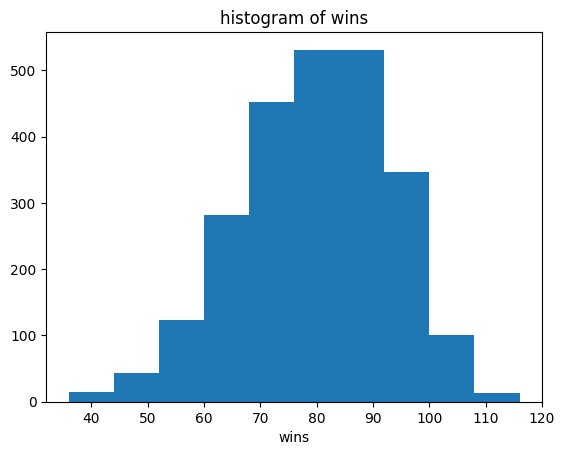

In [29]:
plt.hist(df['W'])
plt.xlabel('wins')
plt.title('histogram of wins')

In [30]:
df['W'].mean()

79.33004926108374

In [31]:
#create bins for each win values
def assign_win_bins(w):
    if w < 50:
        return 1
    if w >= 50 and w <= 69:
        return 2
    if w >= 70 and w <= 89:
        return 3
    if w >= 90 and w <= 109:
        return 4
    if w >= 110:
        return 5

In [32]:
#apply to the 'W' column
df['win_bins'] = df['W'].apply(assign_win_bins)

Text(0, 0.5, 'wins')

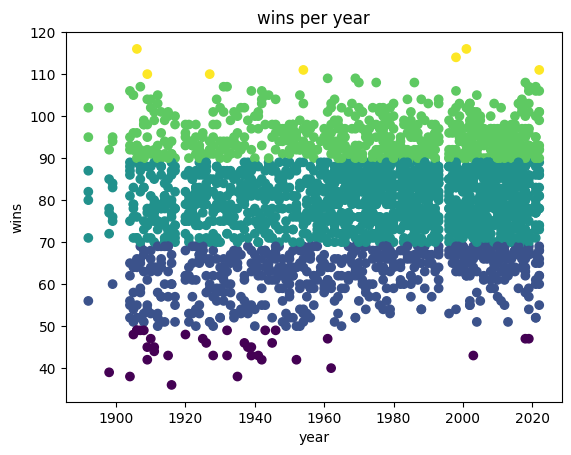

In [33]:
plt.scatter(df['yearID'],df['W'],c=df['win_bins'])
plt.title('wins per year')
plt.xlabel('year')
plt.ylabel('wins')

In [34]:
df = df[df['yearID']>1900]

In [35]:
	
runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games

In [36]:
print(runs_per_year)

{1961: 12942, 1962: 14461, 1963: 12780, 1964: 13124, 1965: 12946, 1966: 12900, 1967: 12210, 1968: 11109, 1969: 15850, 1970: 16880, 1971: 15073, 1972: 13706, 1973: 16376, 1974: 16046, 1975: 16295, 1976: 15492, 1977: 18803, 1978: 17251, 1979: 18713, 1980: 18053, 1982: 18110, 1983: 18170, 1984: 17921, 1985: 18216, 1986: 18545, 1987: 19883, 1988: 17380, 1989: 17405, 1990: 17919, 1991: 18127, 1992: 17341, 1993: 20864, 1996: 22831, 1997: 21604, 1998: 23297, 1999: 24691, 2000: 24971, 2001: 23199, 2002: 22408, 2003: 22978, 2004: 23376, 2005: 22325, 2006: 23599, 2007: 23322, 2008: 22585, 2009: 22419, 2010: 21308, 2011: 20808, 2012: 21017, 2013: 20255, 2014: 19761, 2015: 20647, 2016: 21744, 2017: 22582, 2018: 21630, 2019: 23467, 2021: 22010, 2022: 20817, 1904: 9305, 1905: 9639, 1906: 8320, 1907: 8189, 1908: 8422, 1909: 8810, 1910: 9584, 1911: 11164, 1912: 11154, 1913: 9964, 1914: 9408, 1915: 9444, 1916: 8889, 1917: 8948, 1920: 10762, 1921: 11935, 1922: 12059, 1923: 11874, 1924: 11722, 1925: 1259

In [37]:
print(games_per_year)

{1961: 2860, 1962: 3242, 1963: 3238, 1964: 3252, 1965: 3246, 1966: 3230, 1967: 3240, 1968: 3250, 1969: 3892, 1970: 3888, 1971: 3876, 1972: 3718, 1973: 3886, 1974: 3890, 1975: 3868, 1976: 3878, 1977: 4206, 1978: 4204, 1979: 4196, 1980: 4210, 1982: 4214, 1983: 4218, 1984: 4210, 1985: 4206, 1986: 4206, 1987: 4210, 1988: 4200, 1989: 4212, 1990: 4210, 1991: 4208, 1992: 4212, 1993: 4538, 1996: 4534, 1997: 4532, 1998: 4864, 1999: 4856, 2000: 4858, 2001: 4858, 2002: 4852, 2003: 4860, 2004: 4856, 2005: 4862, 2006: 4858, 2007: 4862, 2008: 4856, 2009: 4860, 2010: 4860, 2011: 4858, 2012: 4860, 2013: 4862, 2014: 4860, 2015: 4858, 2016: 4856, 2017: 4860, 2018: 4862, 2019: 4858, 2021: 4858, 2022: 4860, 1904: 2496, 1905: 2474, 1906: 2305, 1907: 2317, 1908: 2488, 1909: 2482, 1910: 2498, 1911: 2474, 1912: 2464, 1913: 2468, 1914: 2512, 1915: 2490, 1916: 2494, 1917: 2494, 1920: 2468, 1921: 2458, 1922: 2476, 1923: 2466, 1924: 2462, 1925: 2456, 1926: 2468, 1927: 2472, 1928: 2462, 1929: 2458, 1930: 2468, 193

In [38]:
mlb_runs_per_game = {}

for k,v in games_per_year.items():
    year = k
    games = v
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs/games

In [39]:
print(mlb_runs_per_game)

{1961: 4.525174825174825, 1962: 4.460518198642813, 1963: 3.9468807906114884, 1964: 4.035670356703567, 1965: 3.9882932840418976, 1966: 3.9938080495356036, 1967: 3.7685185185185186, 1968: 3.4181538461538463, 1969: 4.07245632065776, 1970: 4.341563786008231, 1971: 3.8888028895768834, 1972: 3.6863905325443787, 1973: 4.214101904271745, 1974: 4.124935732647815, 1975: 4.21277145811789, 1976: 3.99484270242393, 1977: 4.470518307180218, 1978: 4.103472882968601, 1979: 4.459723546234509, 1980: 4.2881235154394295, 1982: 4.297579496915045, 1983: 4.307728781412992, 1984: 4.256769596199525, 1985: 4.330955777460771, 1986: 4.409177365668093, 1987: 4.722802850356294, 1988: 4.1380952380952385, 1989: 4.132241215574549, 1990: 4.256294536817102, 1991: 4.307747148288973, 1992: 4.1170465337132, 1993: 4.597620096959012, 1996: 5.0355094838994265, 1997: 4.766990291262136, 1998: 4.789679276315789, 1999: 5.0846375617792425, 2000: 5.140181144503911, 2001: 4.7754219843557015, 2002: 4.6183017312448476, 2003: 4.72798353

In [41]:
#create lists from mlb_runs_per_game dictionary
lists = sorted(mlb_runs_per_game.items())
x,y = zip(*lists)
#x is the list of keys, y is the list of values


Text(0, 0.5, 'mlb runs per game')

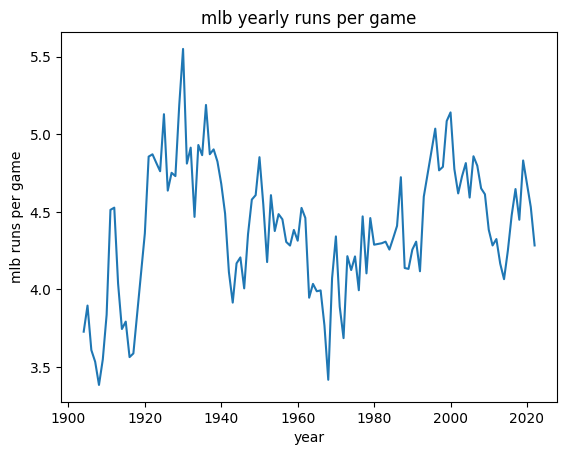

In [42]:
#create line plot of mlb_runs_per_game vs year
plt.plot(x,y)
plt.title('mlb yearly runs per game')
plt.xlabel('year')
plt.ylabel('mlb runs per game')

In [43]:
def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8

In [44]:
df['year_label'] = df['yearID'].apply(assign_label)

In [45]:
dummy_df = pd.get_dummies(df['year_label'],prefix='era')

In [46]:
dummy_df.head()

,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8
0,False,False,False,True,False,False,False,False
1,False,False,False,True,False,False,False,False
2,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,False
4,False,False,False,False,True,False,False,False


In [47]:
df = pd.concat([df,dummy_df],axis=1)
df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,win_bins,year_label,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8
0,1961,LAA,162,70,744,5424,1331,218,22,189,...,3,4,False,False,False,True,False,False,False,False
1,1962,LAA,162,86,718,5499,1377,232,35,137,...,3,4,False,False,False,True,False,False,False,False
2,1963,LAA,161,70,597,5506,1378,208,38,95,...,3,5,False,False,False,False,True,False,False,False
3,1964,LAA,162,82,544,5362,1297,186,27,102,...,3,5,False,False,False,False,True,False,False,False
4,1965,CAL,162,75,527,5354,1279,200,36,92,...,3,5,False,False,False,False,True,False,False,False


In [48]:
def assign_mlb_rpg(year):
    return mlb_runs_per_game[year]
df['mlb_rpg'] = df['yearID'].apply(assign_mlb_rpg)

In [49]:
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010

In [50]:
df['decade_label'] = df['yearID'].apply(assign_decade)
decade_df = pd.get_dummies(df['decade_label'],prefix='decade')
decade_df.head()

,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
0,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False


In [51]:
df = pd.concat([df,decade_df],axis=1)

In [52]:
df = df.drop(['yearID','year_label','decade_label'],axis=1)

In [53]:
df['R_per_game'] = df['R']/df['G']
df['RA_per_game'] = df['RA']/df['G']

Text(0.5, 0, 'runs allowed per game')

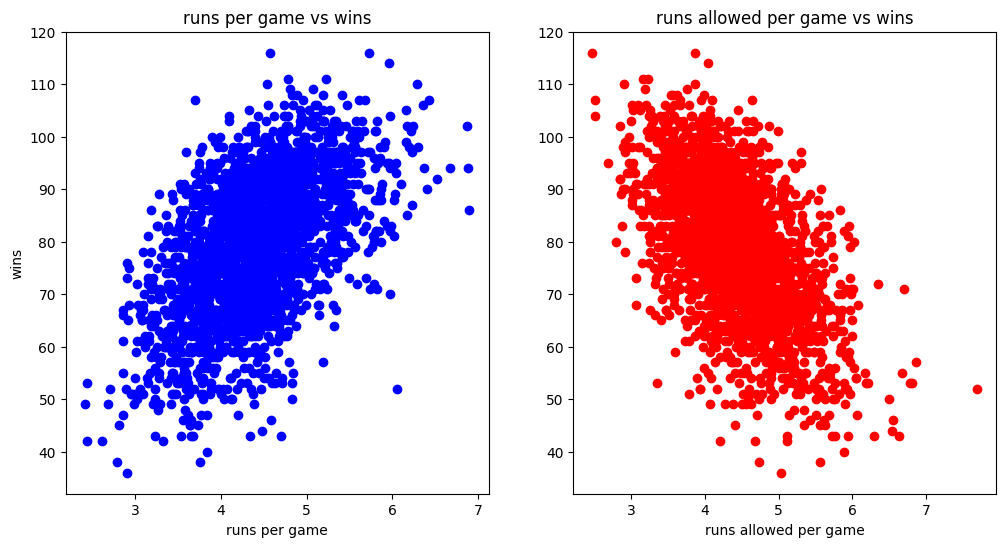

In [54]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df['R_per_game'],df['W'],c='blue')
ax1.set_title('runs per game vs wins')
ax1.set_ylabel('wins')
ax1.set_xlabel('runs per game')

ax2.scatter(df['RA_per_game'],df['W'],c='red')
ax2.set_title('runs allowed per game vs wins')
ax2.set_xlabel('runs allowed per game')

In [61]:
attributes = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG',
'SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3','era_4','era_5','era_6','era_7','era_8','decade_1910','decade_1920','decade_1930','decade_1940','decade_1950','decade_1960','decade_1970','decade_1980','decade_1990','decade_2000','decade_2010','R_per_game','RA_per_game','mlb_rpg']

In [62]:
data_attributes = df[attributes]
df.head()

,teamID,G,W,R,AB,H,2B,3B,HR,BB,...,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game
0,LAA,162,70,744,5424,1331,218,22,189,681,...,False,False,True,False,False,False,False,False,4.592593,4.839506
1,LAA,162,86,718,5499,1377,232,35,137,602,...,False,False,True,False,False,False,False,False,4.432099,4.358025
2,LAA,161,70,597,5506,1378,208,38,95,448,...,False,False,True,False,False,False,False,False,3.708075,4.099379
3,LAA,162,82,544,5362,1297,186,27,102,472,...,False,False,True,False,False,False,False,False,3.358025,3.401235
4,CAL,162,75,527,5354,1279,200,36,92,443,...,False,False,True,False,False,False,False,False,3.253086,3.512346


In [63]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [64]:
score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters = i, random_state=1)
    l = km.fit_predict(data_attributes)
    score = metrics.silhouette_score(data_attributes,l)
    score_dict[i] = score

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

In [65]:
score_dict

{2: 0.3950919619369786,
 3: 0.27180167652108456,
 4: 0.2598328743543863,
 5: 0.24200475551543796,
 6: 0.2252990347301148,
 7: 0.20661818087562933,
 8: 0.19040193893946197,
 9: 0.1821319814269992,
 10: 0.17949777032265804}

In [66]:
kmeans_model = KMeans(n_clusters = 6, random_state=1)
#determine euclidian distances for each data points
distances = kmeans_model.fit_transform(data_attributes)
distances

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 665.25981477,  513.34918063,  400.12556634,  903.47208935,
         351.85862409,  944.8081577 ],
       [ 505.42394206,  617.66100479,  175.8444034 ,  722.17610021,
         352.28059999,  787.70832334],
       [ 512.81859654,  608.44372085,  173.33216664,  756.87267407,
         439.26770725,  721.42455108],
       ...,
       [1185.6496049 ,  301.29476343,  815.69339574, 1403.11320755,
         587.3722072 , 1393.07068184],
       [1025.44746408,  270.54452986,  713.00239833, 1257.26838398,
         508.89982119, 1237.37411266],
       [ 920.21166413,  323.30434973,  595.92893118, 1127.44460651,
         412.28081959, 1135.45334455]])

Text(0.5, 1.0, 'kmeans clusters')

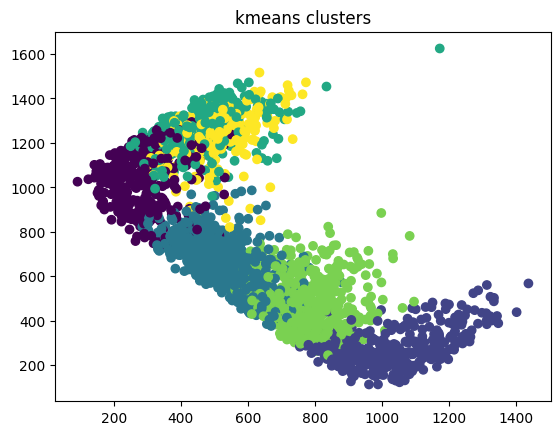

In [67]:
#create scatter plot colored by kmeans clusters
labels = kmeans_model.labels_
plt.scatter(distances[:,0],distances[:,1],c=labels)
plt.title('kmeans clusters')


In [68]:
df['labels'] = labels
attributes.append('labels')
df.head()

,teamID,G,W,R,AB,H,2B,3B,HR,BB,...,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,labels
0,LAA,162,70,744,5424,1331,218,22,189,681,...,False,True,False,False,False,False,False,4.592593,4.839506,4
1,LAA,162,86,718,5499,1377,232,35,137,602,...,False,True,False,False,False,False,False,4.432099,4.358025,2
2,LAA,161,70,597,5506,1378,208,38,95,448,...,False,True,False,False,False,False,False,3.708075,4.099379,2
3,LAA,162,82,544,5362,1297,186,27,102,472,...,False,True,False,False,False,False,False,3.358025,3.401235,2
4,CAL,162,75,527,5354,1279,200,36,92,443,...,False,True,False,False,False,False,False,3.253086,3.512346,2


In [69]:
numeric_cols = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3','era_4','era_5','era_6','era_7','era_8','decade_1910','decade_1920','decade_1930','decade_1940','decade_1950','decade_1960','decade_1970','decade_1980','decade_1990','decade_2000','decade_2010','R_per_game','RA_per_game','mlb_rpg','labels','W']
data = df[numeric_cols]
data.head()


,G,R,AB,H,2B,3B,HR,BB,SO,SB,...,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,mlb_rpg,labels,W
0,162,744,5424,1331,218,22,189,681,1068.0,37,...,False,False,False,False,False,4.592593,4.839506,4.525175,4,70
1,162,718,5499,1377,232,35,137,602,917.0,46,...,False,False,False,False,False,4.432099,4.358025,4.460518,2,86
2,161,597,5506,1378,208,38,95,448,916.0,43,...,False,False,False,False,False,3.708075,4.099379,3.946881,2,70
3,162,544,5362,1297,186,27,102,472,920.0,49,...,False,False,False,False,False,3.358025,3.401235,4.035670,2,82
4,162,527,5354,1279,200,36,92,443,973.0,107,...,False,False,False,False,False,3.253086,3.512346,3.988293,2,75


In [70]:
train = data.sample(frac = 0.75, random_state=1)
test = data.loc[~data.index.isin(train.index)]

In [71]:
x_train = train[attributes]
y_train = train['W']
x_test = test[attributes]
y_test = test['W']

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [74]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [77]:
predictions = lr.predict(x_test)
mae = mean_absolute_error(y_test,predictions)
mae

2.841236201284821

In [79]:
from sklearn.linear_model import RidgeCV
rrm = RidgeCV(alphas=(0.01,0.1,1,10))
rrm.fit(x_train,y_train)

RidgeCV(alphas=(0.01, 0.1, 1, 10))

In [80]:
predictions = rrm.predict(x_test)
mae_rrm = mean_absolute_error(y_test,predictions)
mae_rrm

2.840673847360202